# EDA - Malware Detection Dataset

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('main.csv')
print(f"Shape: {df.shape}")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Shape: (101818, 54)
Memory: 52.1 MB


In [3]:
df.head()

,sha256,Duplicate Permissions Requested,Permissions Requested,Activities Declared,Services Declared,Broadcast Receivers,Content Providers Declared,Metadata Elements,Version Code,Target SDK Version,Is App Taking Backup,Remote Command Execution,Rootkit Installation,Exploit Delivery,Data Exfiltration,Credential Theft,Screen Logging,Keylogging,Audio Surveillance,Social Engineering Attack,GPS Spoofing,Device Bricking,Call Interception,Network Traffic Interception,Device Lockout,Browser Hijacking,System Settings Modification,File System Manipulation,Camera Hijacking,App Installation without User Consent,Location Tracking,Contact Information Theft,Browser History Theft,Package Management Manipulation,Notification Manipulation,System Log Manipulation,Process Management Manipulation,Alarm Hijacking,Calendar Event Manipulation,Task Manipulation,Fake App Installation,Bluetooth Hijacking,WiFi Network Hijacking,USB Debugging Exploitation,Screen Overlay Attack,Sim Card Manipulation,Battery Drain Attack,SMS Spamming,Ad Fraud,Account Information Theft,Certificate Manipulation,Runtime Environment Manipulation,Call Log Manipulation,Label
0,0341A222E2A992F8041785565D7C8B25A6032CDE2CBD5B...,5,40,48,7,3,2,9,1,22,0,3,4,3,4,3,3,4,3,1,0,0,1,2,0,1,2,2,0,0,1,0,0,0,0,1,0,1,0,1,0,2,2,0,1,2,0,0,2,0,2,0,0,1
1,1C552C1DA4A6EBD6BCA7513F0979A7622338B53676C1FB...,0,13,35,12,13,2,22,300111,34,0,1,1,1,2,1,1,1,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0
2,9434A57E25A91ECCB2A867A3FB70D04A59C1BB155408B8...,0,10,2,6,2,2,22,150201,33,0,1,1,1,2,1,1,1,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
3,5D525FBBFF85E50CB79676A18A4C114CC18DB9E472DBCC...,24,42,26,1,5,2,1,17,29,0,5,3,1,4,5,4,4,3,4,0,0,1,3,0,1,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0
4,C0DAF0CD779044B42CE420F82D7A96A963AF86EBA6854C...,0,0,4,0,0,1,7,1,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Basic Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101818 entries, 0 to 101817
Data columns (total 54 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   sha256                                 101818 non-null  object
 1   Duplicate Permissions Requested        101818 non-null  int64 
 2   Permissions Requested                  101818 non-null  int64 
 3   Activities Declared                    101818 non-null  int64 
 4   Services Declared                      101818 non-null  int64 
 5   Broadcast Receivers                    101818 non-null  int64 
 6   Content Providers Declared             101818 non-null  int64 
 7   Metadata Elements                      101818 non-null  int64 
 8   Version Code                           101818 non-null  int64 
 9   Target SDK Version                     101818 non-null  int64 
 10  Is App Taking Backup                   101818 non-null  int64 
 11  

## Data Types

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}")
df.dtypes.value_counts()

Numeric: 53, Categorical: 1


int64     53
object     1
Name: count, dtype: int64

## Missing Values

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values")

No missing values


## Target Distribution

Target: Label


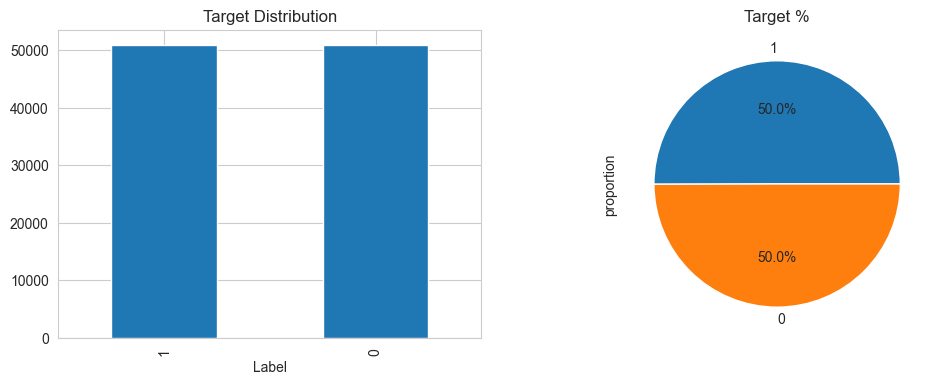

In [7]:
target_col = df.columns[-1]
print(f"Target: {target_col}")
df[target_col].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[target_col].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Target Distribution')
df[target_col].value_counts(normalize=True).plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Target %')
plt.show()

## Statistics

In [8]:
feature_cols = [col for col in df.columns if col not in ['sha256', target_col]]
numeric_features = [col for col in feature_cols if col in numeric_cols]
df[numeric_features].describe()

,Duplicate Permissions Requested,Permissions Requested,Activities Declared,Services Declared,Broadcast Receivers,Content Providers Declared,Metadata Elements,Version Code,Target SDK Version,Is App Taking Backup,Remote Command Execution,Rootkit Installation,Exploit Delivery,Data Exfiltration,Credential Theft,Screen Logging,Keylogging,Audio Surveillance,Social Engineering Attack,GPS Spoofing,Device Bricking,Call Interception,Network Traffic Interception,Device Lockout,Browser Hijacking,System Settings Modification,File System Manipulation,Camera Hijacking,App Installation without User Consent,Location Tracking,Contact Information Theft,Browser History Theft,Package Management Manipulation,Notification Manipulation,System Log Manipulation,Process Management Manipulation,Alarm Hijacking,Calendar Event Manipulation,Task Manipulation,Fake App Installation,Bluetooth Hijacking,WiFi Network Hijacking,USB Debugging Exploitation,Screen Overlay Attack,Sim Card Manipulation,Battery Drain Attack,SMS Spamming,Ad Fraud,Account Information Theft,Certificate Manipulation,Runtime Environment Manipulation,Call Log Manipulation
count,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,1.018180e+05,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.00000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000,101818.000000
mean,8.945717,28.123190,22.716013,7.786609,5.915290,2.340686,12.903897,6.724511e+07,24.038431,0.154668,2.866910,2.961932,2.553645,3.245320,3.107260,2.783928,3.430769,2.429953,1.469662,0.013946,0.015115,0.617347,2.212241,0.117298,1.113526,0.599727,1.503752,0.528060,0.60673,0.176462,0.149482,0.057465,0.327545,0.009055,0.133532,0.172749,0.595356,0.061305,0.432753,0.276925,0.204856,0.991996,0.104009,0.365014,0.887977,0.012267,0.454448,1.957915,0.289939,1.287700,0.102487,0.050148
std,24.061715,34.853817,45.667128,8.116838,6.124994,5.468337,23.453299,3.544845e+08,9.779024,0.361590,1.679056,1.437149,1.228116,0.884827,1.561252,1.253755,1.942798,0.965806,1.464412,0.140301,0.122012,0.634019,0.519491,0.338902,0.353632,0.966715,1.147281,0.730888,0.98123,0.381215,0.451992,0.256232,0.765453,0.094728,0.340151,0.391033,0.628685,0.340855,0.535729,0.675301,0.556934,0.838352,0.305274,0.481436,0.805989,0.110076,0.731955,0.243333,0.635978,0.812163,0.322530,0.282471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,6.000000,3.000000,2.000000,0.000000,3.000000,3.000000e+00,19.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,16.000000,10.000000,6.000000,5.000000,1.000000,7.000000,2.100000e+01,28.000000,0.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000

# Additional statistics


In [9]:
print("\nAdditional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': df[numeric_features].skew(),
    'Kurtosis': df[numeric_features].kurtosis(),
    'Variance': df[numeric_features].var(),
    'Unique_Values': df[numeric_features].nunique()
}).sort_values('Skewness', ascending=False)
print(additional_stats.head(20))


Additional Statistics:
                                   Skewness    Kurtosis      Variance  \
Content Providers Declared        12.383820  216.738213  2.990271e+01   
GPS Spoofing                      11.195026  135.661716  1.968430e-02   
Notification Manipulation         10.365519  105.446045  8.973462e-03   
Battery Drain Attack               8.861961   76.535852  1.211663e-02   
Metadata Elements                  8.264256   84.464823  5.500572e+02   
Device Bricking                    7.948318   61.176955  1.488688e-02   
Activities Declared                6.991846   64.503738  2.085487e+03   
Call Log Manipulation              5.967130   35.807822  7.978965e-02   
Broadcast Receivers                5.504064   86.199969  3.751555e+01   
Calendar Event Manipulation        5.444662   27.838271  1.161823e-01   
Version Code                       5.422116   27.856350  1.256593e+17   
Services Declared                  5.184386   58.346598  6.588305e+01   
Duplicate Permissions Reque

## 5. Feature Distribution Analysis

## Creating the file to be submitted

In [10]:
# Identify constant, quasi-constant, and binary features
constant_features = []
quasi_constant_features = []
binary_features = []
low_variance_features = []
for col in numeric_features:
    unique_count = df[col].nunique()
    variance = df[col].var()
    if unique_count == 1:
        constant_features.append(col)
    elif unique_count == 2:
        binary_features.append(col)
    elif unique_count < 10:
        quasi_constant_features.append(col)
    if variance < 0.01:
        low_variance_features.append(col)
print(f"Constant Features (nunique=1): {len(constant_features)}")
if constant_features:
    print(f"  Examples: {constant_features[:5]}")
print(f"\nBinary Features (nunique=2): {len(binary_features)}")
if binary_features:
    print(f"  Examples: {binary_features[:10]}")
print(f"\nQuasi-Constant Features (nunique<10): {len(quasi_constant_features)}")
if quasi_constant_features:
    print(f"  Examples: {quasi_constant_features[:10]}")
print(f"\nLow Variance Features (var<0.01): {len(low_variance_features)}")
if low_variance_features:
    print(f"  Examples: {low_variance_features[:10]}")

Constant Features (nunique=1): 0

Binary Features (nunique=2): 8
  Examples: ['Is App Taking Backup', 'Device Bricking', 'Location Tracking', 'Notification Manipulation', 'System Log Manipulation', 'USB Debugging Exploitation', 'Screen Overlay Attack', 'Battery Drain Attack']

Quasi-Constant Features (nunique<10): 32
  Examples: ['Exploit Delivery', 'Data Exfiltration', 'Credential Theft', 'Screen Logging', 'Audio Surveillance', 'Social Engineering Attack', 'GPS Spoofing', 'Call Interception', 'Network Traffic Interception', 'Device Lockout']

Low Variance Features (var<0.01): 1
  Examples: ['Notification Manipulation']


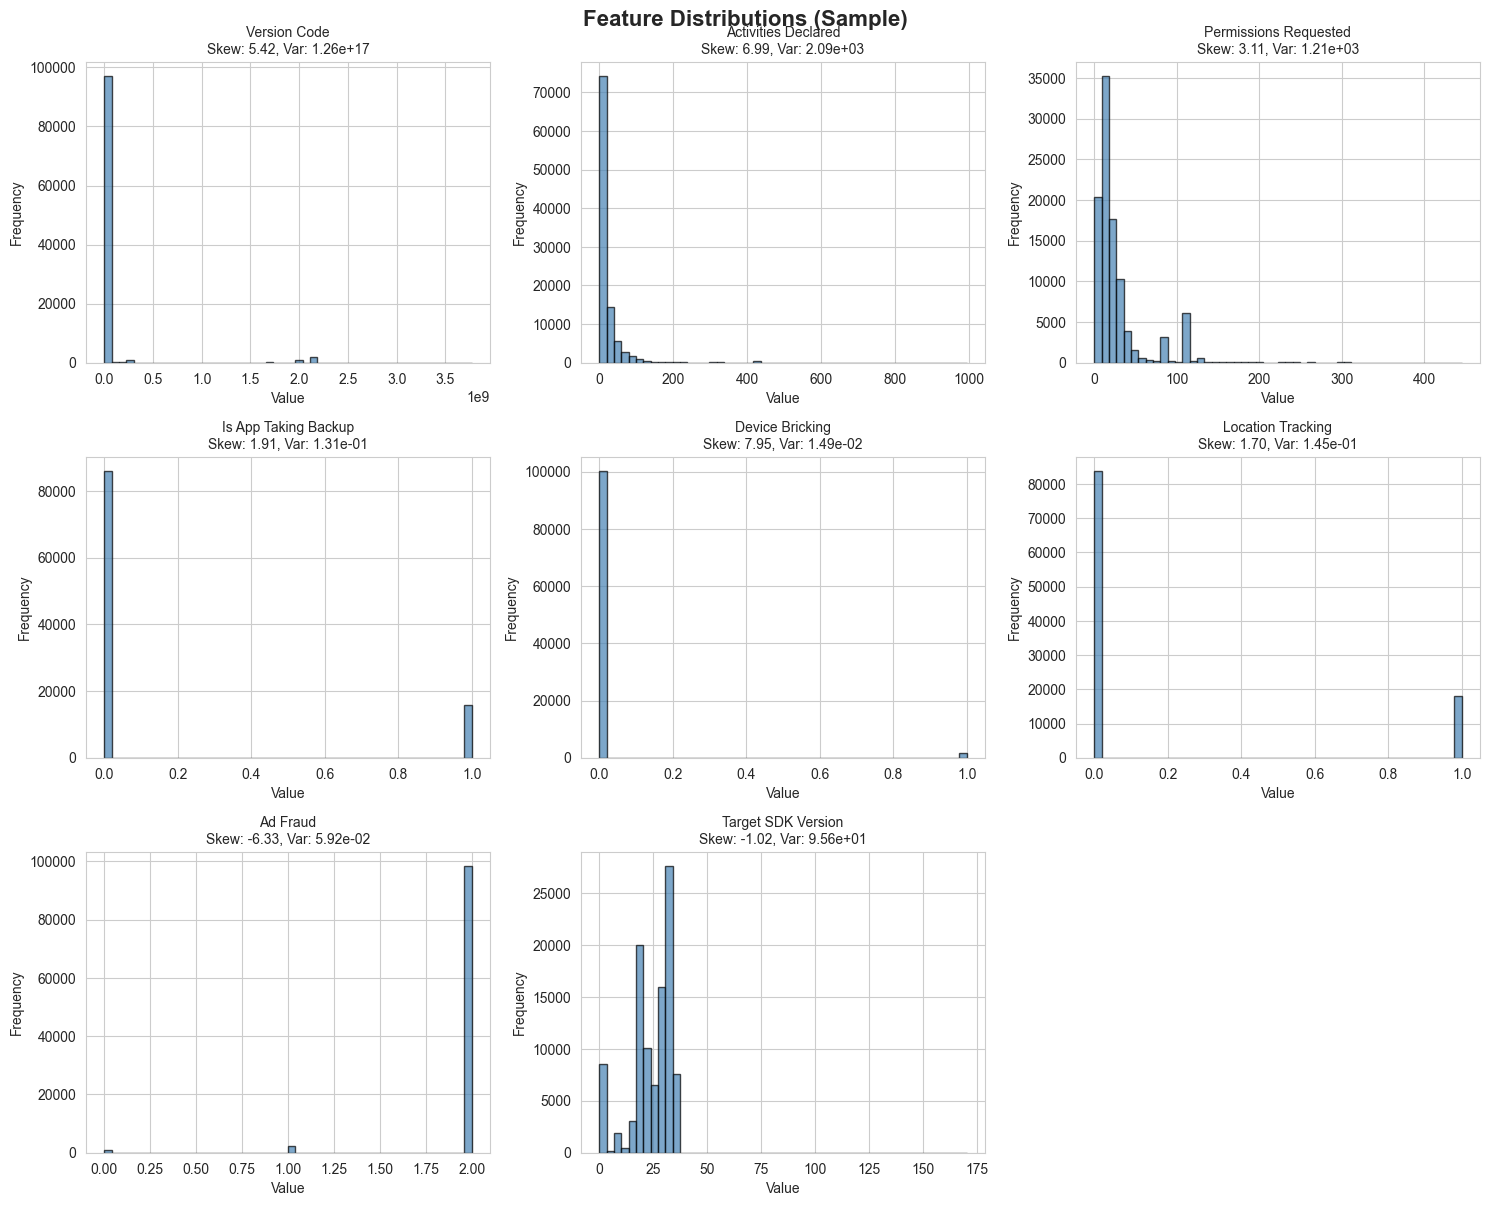

In [11]:
# Plot distributions for a sample of features with varying characteristics
# Select diverse features: high variance, low variance, binary, etc.
sample_features = []
# Get some high variance features
high_var_features = additional_stats.nlargest(5, 'Variance').index.tolist()
sample_features.extend(high_var_features[:3])
# Get some binary features
if len(binary_features) > 0:
    sample_features.extend(binary_features[:3])
# Get some features with different skewness
if len(additional_stats) > 10:
    sample_features.extend(additional_stats.nsmallest(2, 'Skewness').index.tolist())
# Remove duplicates and limit to 12 features for visualization
sample_features = list(dict.fromkeys(sample_features))[:12]
if len(sample_features) > 0:
    # Create distribution plots
    n_cols = 3
    n_rows = (len(sample_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    for idx, col in enumerate(sample_features):
        if idx < len(axes):
            df[col].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7, color='steelblue')
            axes[idx].set_title(f'{col}\nSkew: {df[col].skew():.2f}, Var: {df[col].var():.2e}', fontsize=10)
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
    # Hide extra subplots
    for idx in range(len(sample_features), len(axes)):
        axes[idx].axis('off')
    plt.tight_layout()
    plt.suptitle('Feature Distributions (Sample)', fontsize=16, fontweight='bold', y=1.001)
    plt.show()
else:
    print("No features to visualize")

Top 20 Features with Most Outliers (IQR Method):
                                  Feature  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
41              Account Information Theft          21752           21.363610          0.0          0.0
7                            Version Code          21642           21.255574       -325.5        550.5
15              Social Engineering Attack          19275           18.930837         -0.5          3.5
26                      Location Tracking          17967           17.646192          0.0          0.0
0         Duplicate Permissions Requested          17375           17.064763         -4.5          7.5
32        Process Management Manipulation          17080           16.775030          0.0          0.0
29        Package Management Manipulation          16898           16.596280          0.0          0.0
9                    Is App Taking Backup          15748           15.466813          0.0          0.0
35                  Fake

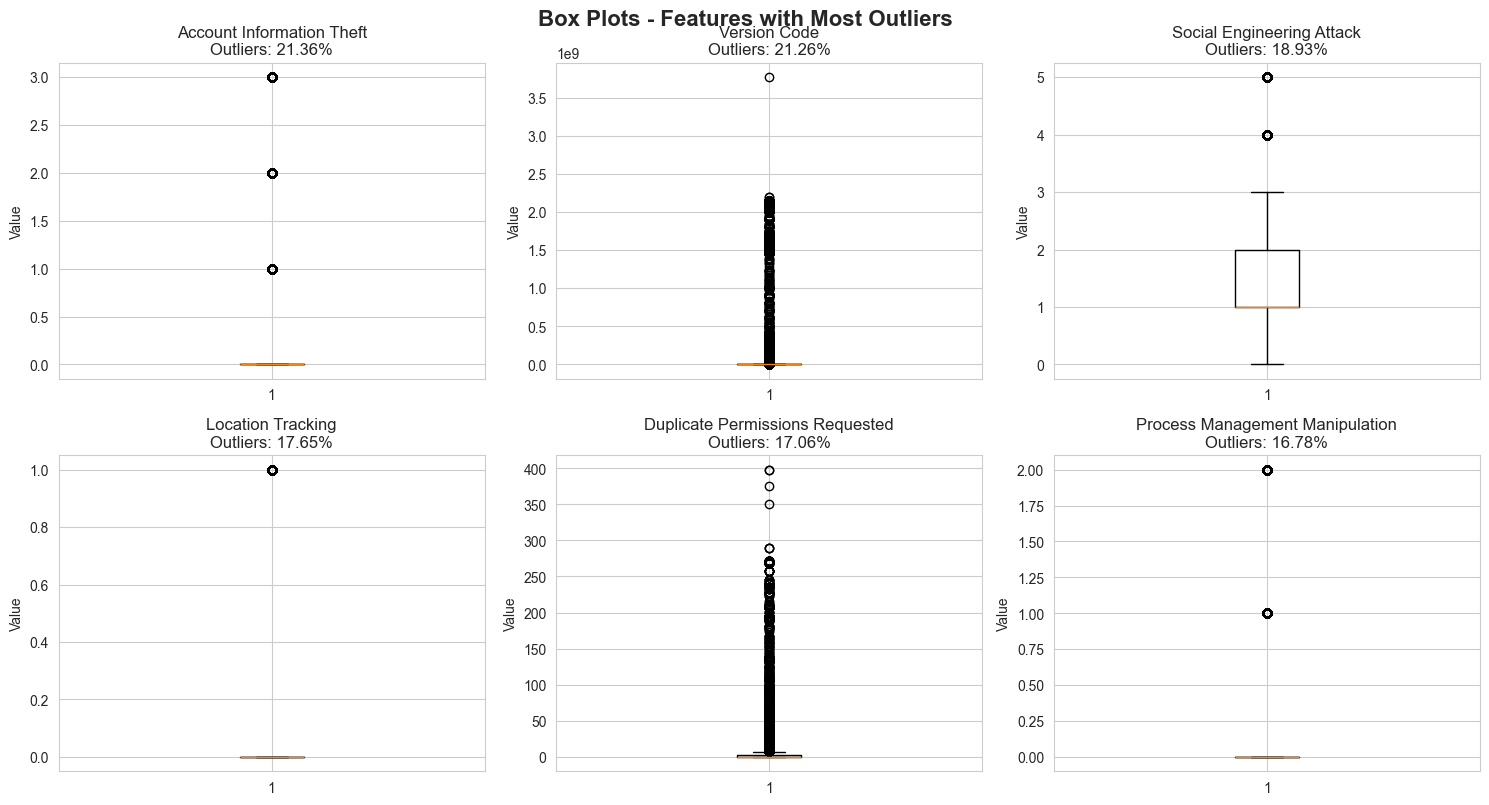

In [12]:
# Outlier detection using IQR method
outlier_summary = []
for col in numeric_features[:50]:  # Analyze first 50 features
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    if outlier_count > 0:
        outlier_summary.append({
            'Feature': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_pct,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)
print("Top 20 Features with Most Outliers (IQR Method):")
print(outlier_df.head(20).to_string())
# Visualize outliers for top features
if len(outlier_df) > 0:
    top_outlier_features = outlier_df.head(6)['Feature'].tolist()
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    for idx, col in enumerate(top_outlier_features):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(f'{col}\nOutliers: {outlier_df[outlier_df["Feature"]==col]["Outlier_Percentage"].values[0]:.2f}%')
        axes[idx].set_ylabel('Value')
    plt.tight_layout()
    plt.suptitle('Box Plots - Features with Most Outliers', fontsize=16, fontweight='bold', y=1.001)
    plt.show()

Correlation Matrix Shape: (30, 30)

Highly Correlated Feature Pairs (|correlation| > 0.7):
                                Feature_1                        Feature_2  Correlation
17                      Data Exfiltration         Certificate Manipulation     0.787458
8                    Rootkit Installation                   Screen Logging     0.776396
1                              Keylogging         Remote Command Execution     0.773966
6                        Credential Theft                   Screen Logging     0.770207
10                         Screen Logging               Audio Surveillance     0.768222
18        Package Management Manipulation            Fake App Installation     0.767533
2                              Keylogging                 Credential Theft     0.761626
16                     Audio Surveillance         Certificate Manipulation     0.758265
0                   Permissions Requested  Duplicate Permissions Requested     0.750484
5                        Cred

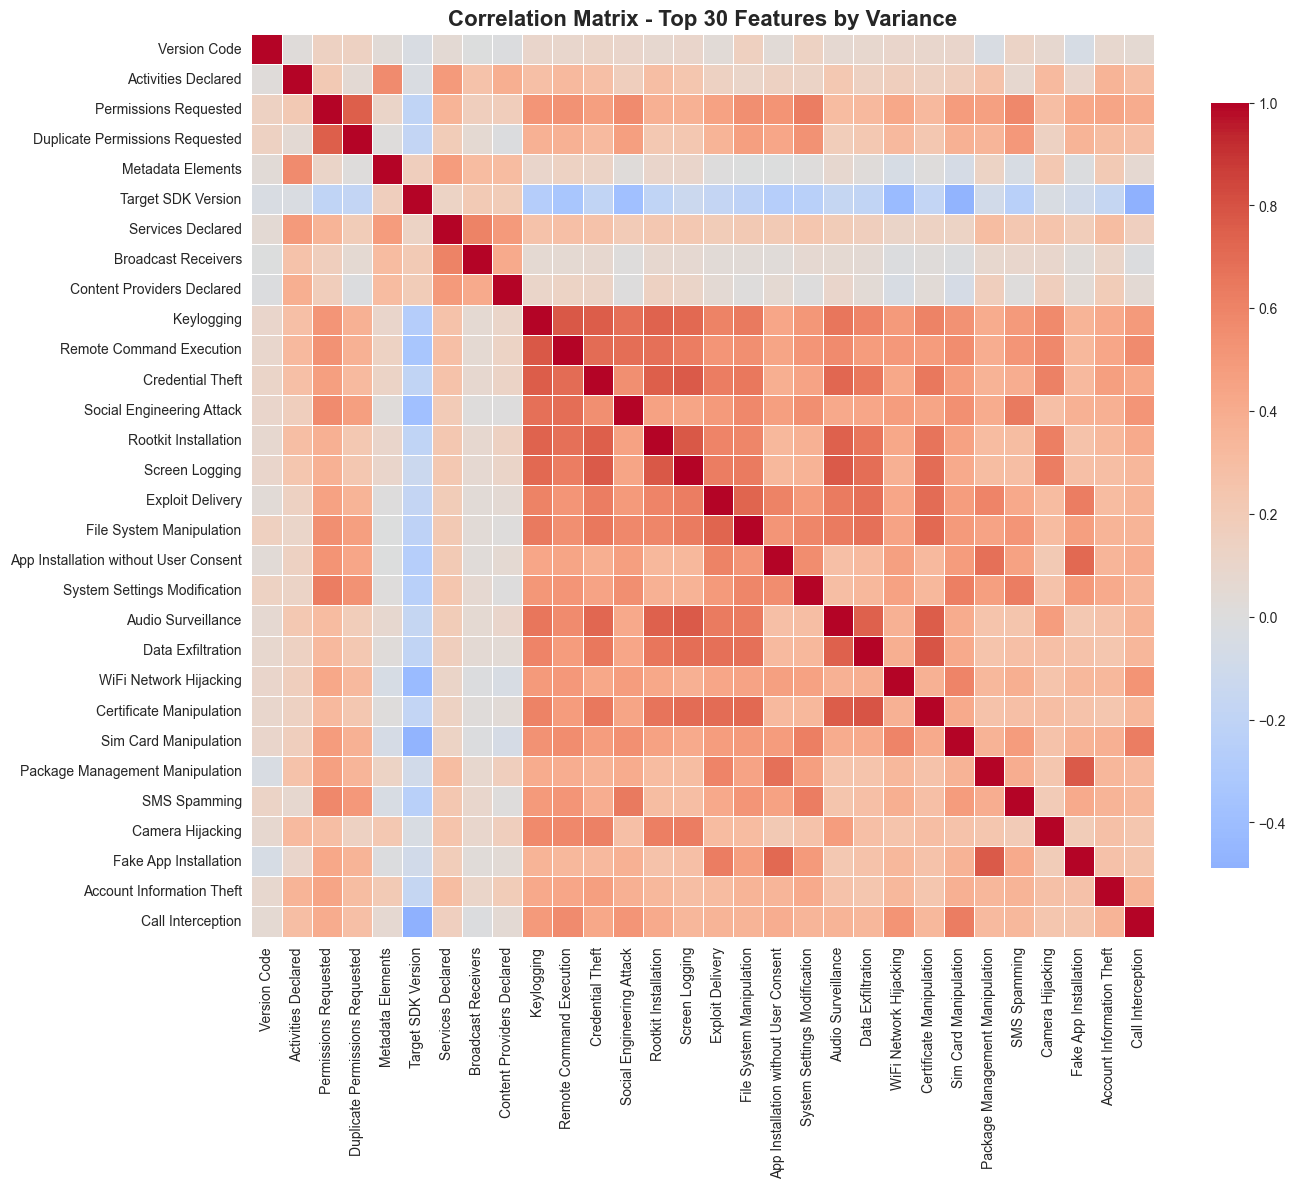

In [13]:
# Calculate correlation matrix for a subset of features (due to large number of features)
# Select features with highest variance for correlation analysis
top_variance_features = additional_stats.nlargest(30, 'Variance').index.tolist()
correlation_matrix = df[top_variance_features].corr()
print(f"Correlation Matrix Shape: {correlation_matrix.shape}")
print(f"\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })
if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.head(20).to_string())
    print(f"\nTotal highly correlated pairs: {len(high_corr_pairs)}")
else:
    print("No feature pairs with correlation > 0.7 found")
# Visualize correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 30 Features by Variance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Top 30 Features Most Correlated with Target:
                                  Feature  Correlation_with_Target  Abs_Correlation
44                  Sim Card Manipulation                 0.655152         0.655152
21                      Call Interception                 0.648065         0.648065
8                      Target SDK Version                -0.621775         0.621775
38                      Task Manipulation                 0.618517         0.618517
41                 WiFi Network Hijacking                 0.611390         0.611390
43                  Screen Overlay Attack                 0.506868         0.506868
18              Social Engineering Attack                 0.504801         0.504801
10               Remote Command Execution                 0.479692         0.479692
28  App Installation without User Consent                 0.462804         0.462804
16                             Keylogging                 0.445093         0.445093
22           Network Traffic In

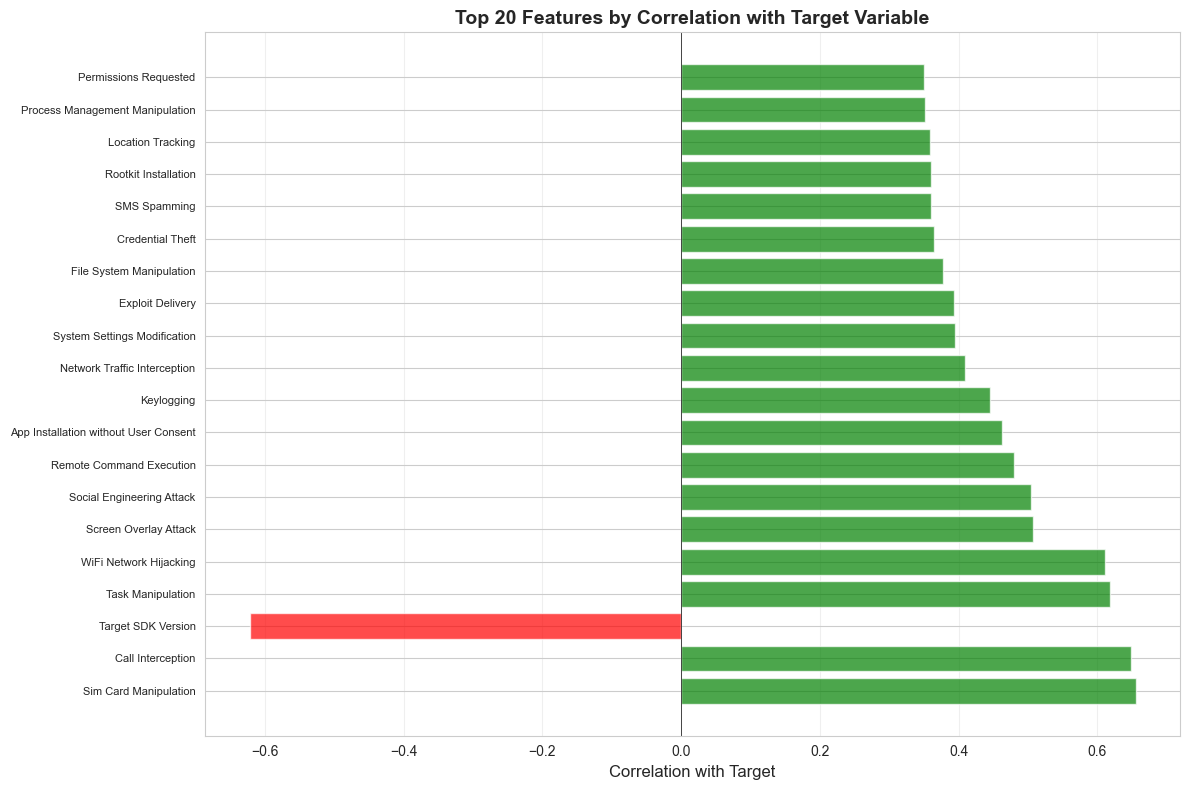

In [14]:
# Analyze relationship between features and target variable
# Calculate correlation with target for numeric features
target_correlations = []
for col in numeric_features:
    corr = df[col].corr(df[target_col])
    target_correlations.append({
        'Feature': col,
        'Correlation_with_Target': corr,
        'Abs_Correlation': abs(corr)
    })
target_corr_df = pd.DataFrame(target_correlations).sort_values('Abs_Correlation', ascending=False)
print("Top 30 Features Most Correlated with Target:")
print(target_corr_df.head(30).to_string())
# Visualize top correlations
top_n = min(20, len(target_corr_df))
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in target_corr_df.head(top_n)['Correlation_with_Target']]
plt.barh(range(top_n), target_corr_df.head(top_n)['Correlation_with_Target'], color=colors, alpha=0.7)
plt.yticks(range(top_n), target_corr_df.head(top_n)['Feature'], fontsize=8)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title(f'Top {top_n} Features by Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Calculating Mutual Information... (this may take a moment)

Top 30 Features by Mutual Information with Target:
                                  Feature  Mutual_Information
8                      Target SDK Version            0.322929
21                      Call Interception            0.298623
44                  Sim Card Manipulation            0.262990
38                      Task Manipulation            0.229188
41                 WiFi Network Hijacking            0.214098
5              Content Providers Declared            0.180437
18              Social Engineering Attack            0.169770
10               Remote Command Execution            0.154960
28  App Installation without User Consent            0.152333
6                       Metadata Elements            0.150690
43                  Screen Overlay Attack            0.142339
16                             Keylogging            0.141281
12                       Exploit Delivery            0.136158
26               File

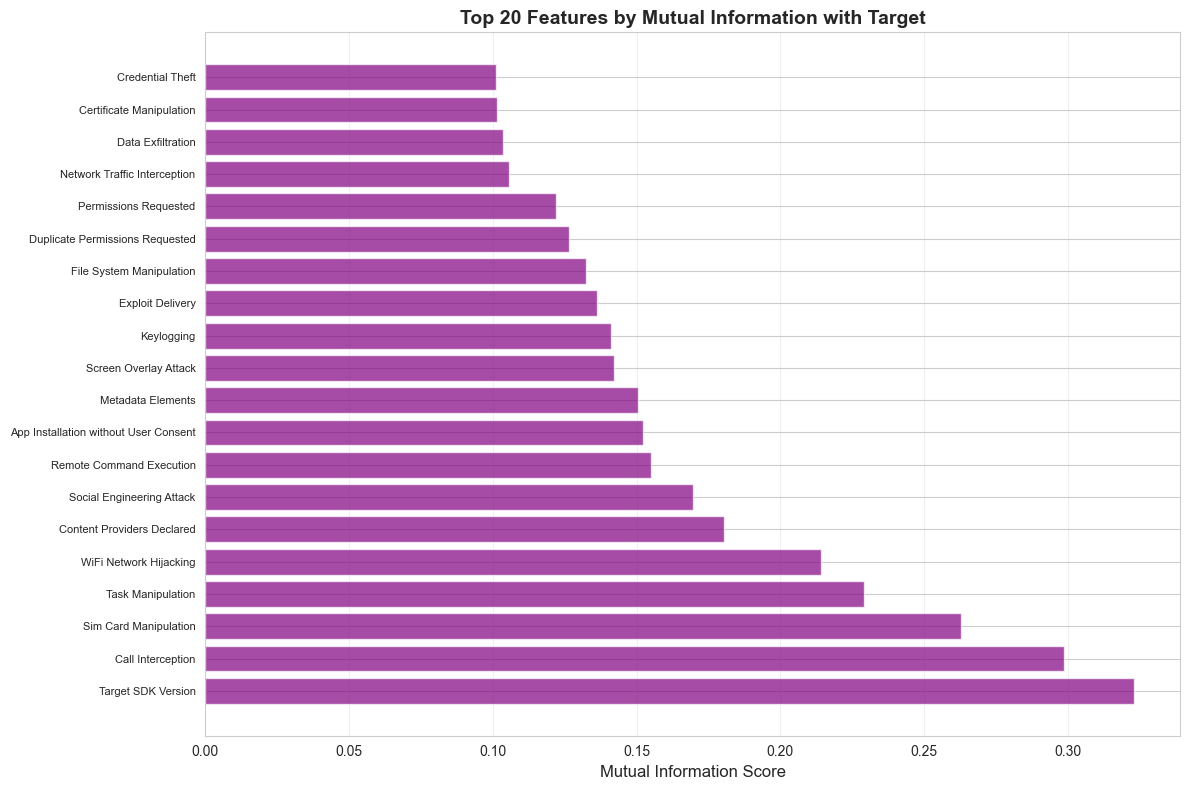


Comparison: Correlation vs Mutual Information (Top 20 by MI):
                                  Feature  Correlation_with_Target  Mutual_Information
2                      Target SDK Version                -0.621775            0.322929
1                       Call Interception                 0.648065            0.298623
0                   Sim Card Manipulation                 0.655152            0.262990
3                       Task Manipulation                 0.618517            0.229188
4                  WiFi Network Hijacking                 0.611390            0.214098
40             Content Providers Declared                -0.135242            0.180437
6               Social Engineering Attack                 0.504801            0.169770
7                Remote Command Execution                 0.479692            0.154960
8   App Installation without User Consent                 0.462804            0.152333
37                      Metadata Elements                -0.149235 

In [15]:
# Calculate mutual information between features and target
# This captures non-linear relationships that correlation might miss
print("Calculating Mutual Information... (this may take a moment)")
# Sample features for faster computation if dataset is very large
sample_size = min(len(numeric_features), 100)
features_for_mi = numeric_features[:sample_size]
X_mi = df[features_for_mi].fillna(0)
y_mi = df[target_col]
# Calculate mutual information
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_df = pd.DataFrame({
    'Feature': features_for_mi,
    'Mutual_Information': mi_scores
}).sort_values('Mutual_Information', ascending=False)
print("\nTop 30 Features by Mutual Information with Target:")
print(mi_df.head(30).to_string())
# Visualize top MI scores
top_n = min(20, len(mi_df))
plt.figure(figsize=(12, 8))
plt.barh(range(top_n), mi_df.head(top_n)['Mutual_Information'], color='purple', alpha=0.7)
plt.yticks(range(top_n), mi_df.head(top_n)['Feature'], fontsize=8)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.title(f'Top {top_n} Features by Mutual Information with Target', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
# Compare correlation vs mutual information for top features
comparison_df = target_corr_df.merge(mi_df, on='Feature', how='inner')
comparison_df = comparison_df.sort_values('Mutual_Information', ascending=False).head(20)
print("\nComparison: Correlation vs Mutual Information (Top 20 by MI):")
print(comparison_df[['Feature', 'Correlation_with_Target', 'Mutual_Information']].to_string())

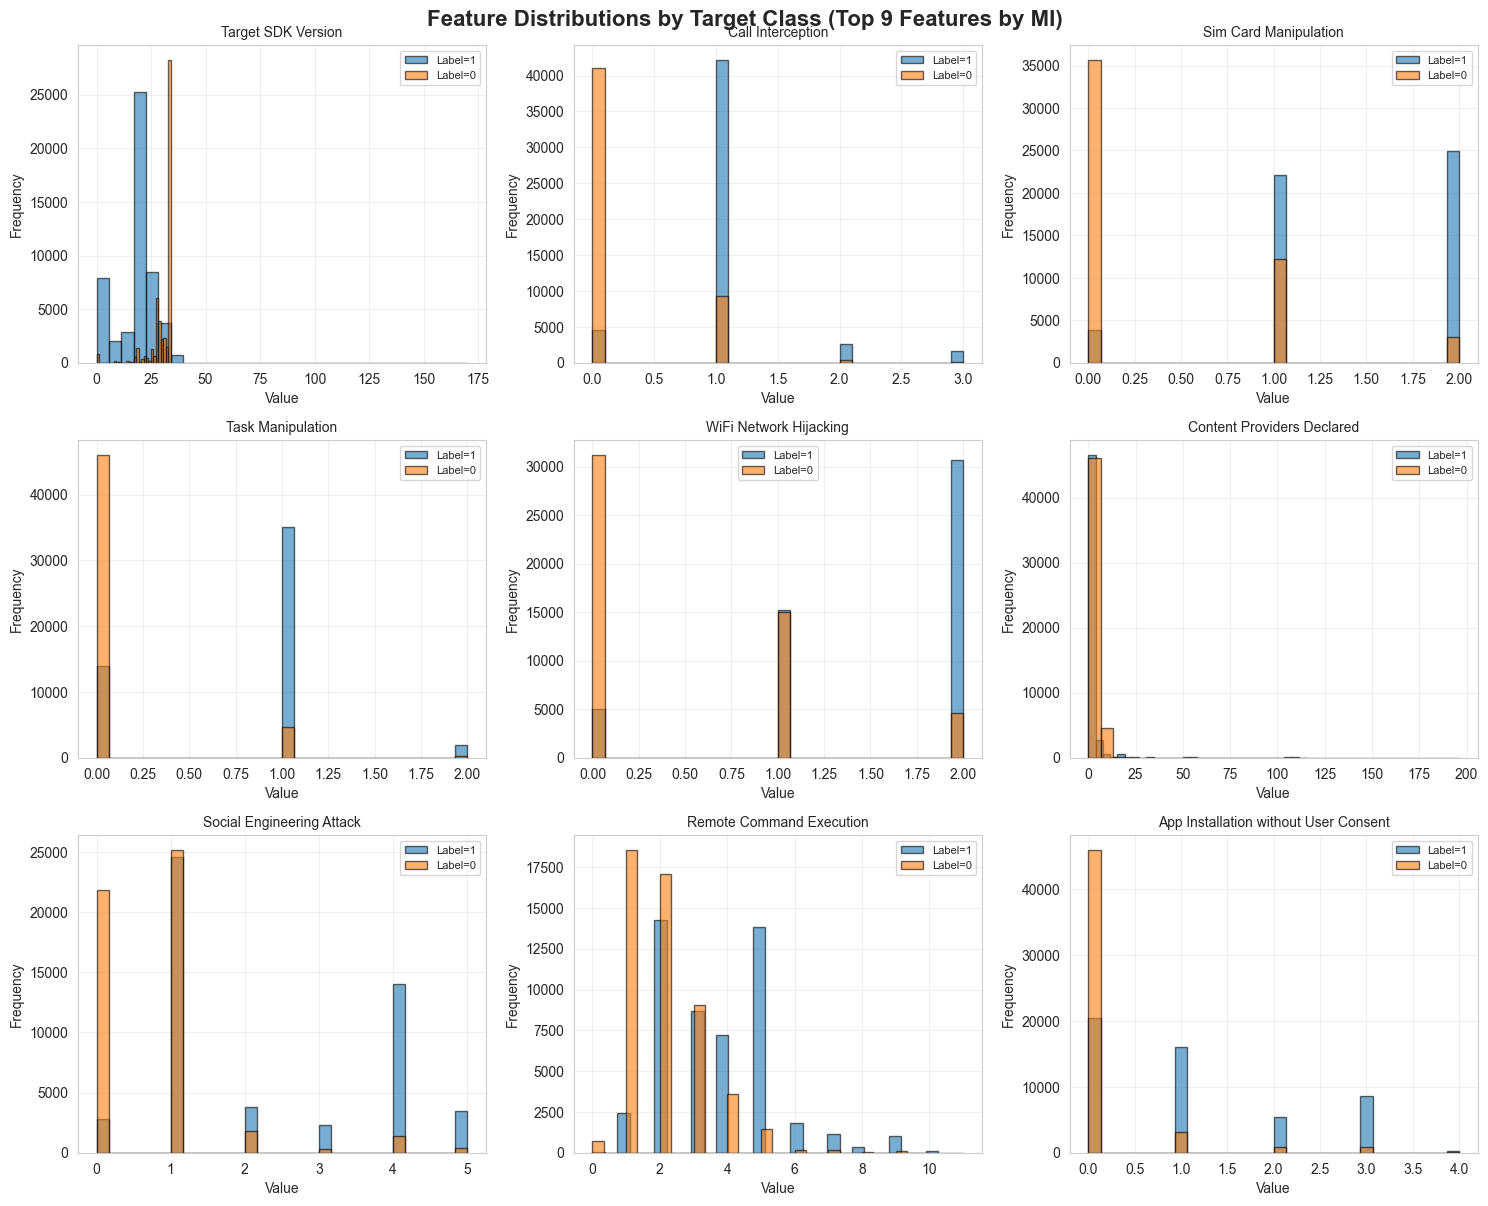

In [16]:
# Visualize how top features differ across target classes
top_features_for_viz = mi_df.head(9)['Feature'].tolist()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for idx, feature in enumerate(top_features_for_viz):
    for target_value in df[target_col].unique():
        subset = df[df[target_col] == target_value][feature]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=f'{target_col}={target_value}', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=10)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)
plt.tight_layout()
plt.suptitle('Feature Distributions by Target Class (Top 9 Features by MI)', fontsize=16, fontweight='bold', y=1.001)
plt.show()

In [17]:
# Perform t-test for top features to see if means differ significantly between classes
from scipy.stats import ttest_ind
ttest_results = []
target_classes = df[target_col].unique()
if len(target_classes) == 2:
    class_0 = df[df[target_col] == target_classes[0]]
    class_1 = df[df[target_col] == target_classes[1]]
    for feature in top_features_for_viz:
        stat, pvalue = ttest_ind(class_0[feature].dropna(), class_1[feature].dropna())
        ttest_results.append({
            'Feature': feature,
            'T_Statistic': stat,
            'P_Value': pvalue,
            'Significant': 'Yes' if pvalue < 0.05 else 'No',
            'Mean_Class_0': class_0[feature].mean(),
            'Mean_Class_1': class_1[feature].mean()
        })
    ttest_df = pd.DataFrame(ttest_results).sort_values('P_Value')
    print("T-Test Results for Top Features:")
    print(ttest_df.to_string())
    print("\nInterpretation: P-value < 0.05 indicates significant difference in means between classes")
else:
    print("T-test requires binary target. Skipping this analysis.")

T-Test Results for Top Features:
                                 Feature  T_Statistic  P_Value Significant  Mean_Class_0  Mean_Class_1
0                     Target SDK Version  -253.320622      0.0         Yes     17.962529     30.123172
1                      Call Interception   271.523669      0.0         Yes      1.027932      0.206164
2                  Sim Card Manipulation   276.705356      0.0         Yes      1.415636      0.359549
3                      Task Manipulation   251.167334      0.0         Yes      0.763868      0.101156
4                 WiFi Network Hijacking   246.529714      0.0         Yes      1.504181      0.479065
5             Content Providers Declared   -43.554131      0.0         Yes      1.601676      3.080771
6              Social Engineering Attack   186.594629      0.0         Yes      2.208358      0.729891
7               Remote Command Execution   174.443474      0.0         Yes      3.671750      2.060898
8  App Installation without User Consent

In [18]:
# Analyze feature value ranges by target class
print("Feature Value Ranges by Target Class:")
for feature in mi_df.head(10)['Feature']:
    print(f"\n{feature}:")
    print("-" * 40)
    for target_value in sorted(df[target_col].unique()):
        subset = df[df[target_col] == target_value][feature]
        print(f"  Class {target_value}: min={subset.min():.4f}, max={subset.max():.4f}, " +
              f"mean={subset.mean():.4f}, median={subset.median():.4f}, std={subset.std():.4f}")

Feature Value Ranges by Target Class:

Target SDK Version:
----------------------------------------
  Class 0: min=0.0000, max=34.0000, mean=30.1232, median=33.0000, std=5.6016
  Class 1: min=0.0000, max=170.0000, mean=17.9625, median=19.0000, std=9.2682

Call Interception:
----------------------------------------
  Class 0: min=0.0000, max=3.0000, mean=0.2062, median=0.0000, std=0.4422
  Class 1: min=0.0000, max=3.0000, mean=1.0279, median=1.0000, std=0.5203

Sim Card Manipulation:
----------------------------------------
  Class 0: min=0.0000, max=2.0000, mean=0.3595, median=0.0000, std=0.5908
  Class 1: min=0.0000, max=2.0000, mean=1.4156, median=1.0000, std=0.6265

Task Manipulation:
----------------------------------------
  Class 0: min=0.0000, max=2.0000, mean=0.1012, median=0.0000, std=0.3149
  Class 1: min=0.0000, max=2.0000, mean=0.7639, median=1.0000, std=0.5051

WiFi Network Hijacking:
----------------------------------------
  Class 0: min=0.0000, max=2.0000, mean=0.4791, 

In [19]:
# Check if variance differs significantly between classes
variance_analysis = []
for feature in mi_df.head(20)['Feature']:
    variances = {}
    for target_value in df[target_col].unique():
        variances[f'Var_Class_{target_value}'] = df[df[target_col] == target_value][feature].var()
    variance_analysis.append({
        'Feature': feature,
        **variances,
        'Variance_Ratio': max(variances.values()) / (min(variances.values()) + 1e-10)
    })
variance_df = pd.DataFrame(variance_analysis).sort_values('Variance_Ratio', ascending=False)
print("Variance Analysis by Target Class (Top 20 Features by MI):")
print(variance_df.head(15).to_string())
print("\nNote: High variance ratio indicates different spread of values across classes")

Variance Analysis by Target Class (Top 20 Features by MI):
                                  Feature  Var_Class_1  Var_Class_0  Variance_Ratio
14        Duplicate Permissions Requested   940.567428   119.614772        7.863305
15                  Permissions Requested  1813.000861   316.823965        5.722423
8   App Installation without User Consent     1.233024     0.279477        4.411906
5              Content Providers Declared    47.442101    11.243717        4.219432
9                       Metadata Elements   838.405187   236.781919        3.540833
6               Social Engineering Attack     2.412313     0.782596        3.082451
0                      Target SDK Version    85.900392    31.378432        2.737562
3                       Task Manipulation     0.255125     0.099181        2.572306
17                      Data Exfiltration     0.399410     0.996218        2.494225
18               Certificate Manipulation     0.359064     0.821753        2.288597
10               

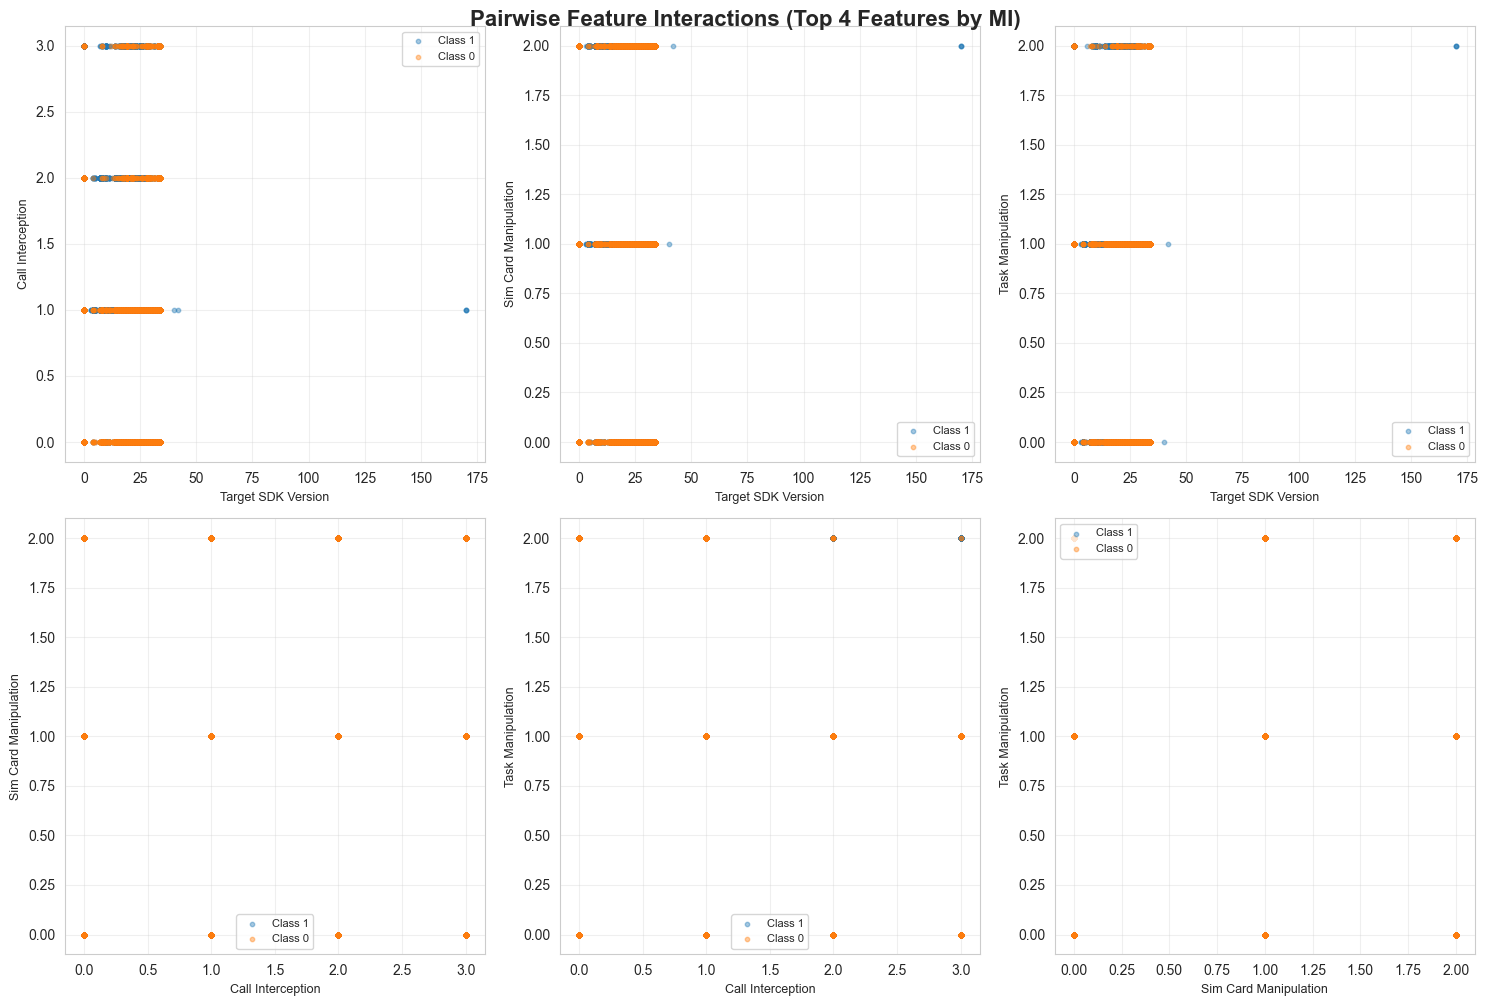

In [20]:
# Visualize pairwise relationships between top features
top_4_features = mi_df.head(4)['Feature'].tolist()
# Create scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
plot_idx = 0
for i in range(len(top_4_features)):
    for j in range(i+1, len(top_4_features)):
        if plot_idx < 6:
            for target_value in df[target_col].unique():
                subset = df[df[target_col] == target_value]
                axes[plot_idx].scatter(subset[top_4_features[i]], subset[top_4_features[j]], 
                                      alpha=0.4, s=10, label=f'Class {target_value}')
            axes[plot_idx].set_xlabel(top_4_features[i], fontsize=9)
            axes[plot_idx].set_ylabel(top_4_features[j], fontsize=9)
            axes[plot_idx].legend(fontsize=8)
            axes[plot_idx].grid(alpha=0.3)
            plot_idx += 1
# Hide unused subplots
for idx in range(plot_idx, 6):
    axes[idx].axis('off')
plt.tight_layout()
plt.suptitle('Pairwise Feature Interactions (Top 4 Features by MI)', fontsize=16, fontweight='bold', y=1.001)
plt.show()

## Handle Missing Values


In [21]:
# Create a copy for preprocessing
df_processed = df.copy()
# Check missing values again
missing_before = df_processed.isnull().sum().sum()
print(f"Total missing values before handling: {missing_before}")
# If there are missing values, handle them
if missing_before > 0:
    # For numeric features: impute with median
    for col in numeric_features:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
    print(f"Missing values filled with median for numeric features")
else:
    print("No missing values to handle")
missing_after = df_processed.isnull().sum().sum()
print(f"Total missing values after handling: {missing_after}")

Total missing values before handling: 0
No missing values to handle
Total missing values after handling: 0


In [22]:
# Remove constant features (provide no information)
features_before = df_processed.shape[1]
if len(constant_features) > 0:
    df_processed.drop(columns=constant_features, inplace=True)
    print(f"Removed {len(constant_features)} constant features")
else:
    print("No constant features to remove")
# Optionally remove quasi-constant features with very low variance
# This is conservative - only remove if >99% of values are the same
quasi_const_to_remove = []
for col in numeric_features:
    if col in df_processed.columns:
        value_counts = df_processed[col].value_counts(normalize=True)
        if len(value_counts) > 0 and value_counts.iloc[0] > 0.99:
            quasi_const_to_remove.append(col)
if len(quasi_const_to_remove) > 0:
    df_processed.drop(columns=quasi_const_to_remove, inplace=True)
    print(f"Removed {len(quasi_const_to_remove)} quasi-constant features (>99% same value)")
features_after = df_processed.shape[1]
print(f"\nFeatures before: {features_before}, Features after: {features_after}")

No constant features to remove
Removed 1 quasi-constant features (>99% same value)

Features before: 54, Features after: 53


In [23]:
# Create a version with capped outliers (using IQR method)
# This is optional - you can choose whether to use this or the original
df_capped = df_processed.copy()
capped_features = 0
# Only cap features with extreme outliers (>10% outlier rate)
if len(outlier_df) > 0:
    features_to_cap = outlier_df[outlier_df['Outlier_Percentage'] > 10]['Feature'].tolist()
    for col in features_to_cap:
        if col in df_capped.columns:
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
            capped_features += 1
    print(f"Capped outliers in {capped_features} features with >10% outlier rate")
    print("Note: df_capped contains the capped version, df_processed retains original values")
else:
    print("No features with significant outliers to cap")

Capped outliers in 18 features with >10% outlier rate
Note: df_capped contains the capped version, df_processed retains original values


In [24]:
# Prepare data for modeling with standardization
# Separate features and target
X = df_processed.drop(columns=[target_col, 'sha256'] if 'sha256' in df_processed.columns else [target_col])
y = df_processed[target_col]
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
# Initialize scaler
scaler = StandardScaler()
# Fit and transform (for demonstration - in practice, fit only on training data)
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)
print("\nFeatures scaled using StandardScaler (mean=0, std=1)")
print("Sample of scaled features:")
print(X_scaled.head())

Feature matrix shape: (101818, 51)
Target vector shape: (101818,)

Features scaled using StandardScaler (mean=0, std=1)
Sample of scaled features:
   Duplicate Permissions Requested  Permissions Requested  \
0                        -0.163984               0.340762   
1                        -0.371784              -0.433906   
2                        -0.371784              -0.519980   
3                         0.625656               0.398145   
4                        -0.371784              -0.806894   

   Activities Declared  Services Declared  Broadcast Receivers  \
0             0.553661          -0.096911            -0.475969   
1             0.268991           0.519095             1.156694   
2            -0.453633          -0.220113            -0.639235   
3             0.071912          -0.836119            -0.149436   
4            -0.409838          -0.959320            -0.965767   

   Content Providers Declared  Metadata Elements  Version Code  \
0                   -0.

In [25]:
# Remove one feature from each highly correlated pair
# This reduces multicollinearity
def remove_correlated_features(df, threshold=0.95):
    """
    Remove features with correlation > threshold
    """
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper_triangle.columns 
               if any(upper_triangle[column] > threshold)]
    return to_drop
# Find highly correlated features (>0.95 correlation)
correlated_features = remove_correlated_features(X_scaled, threshold=0.95)
print(f"Features to remove due to high correlation (>0.95): {len(correlated_features)}")
if len(correlated_features) > 0:
    print(f"Examples: {correlated_features[:10]}")
    # Create version without highly correlated features
    X_reduced = X_scaled.drop(columns=correlated_features)
    print(f"\nOriginal features: {X_scaled.shape[1]}")
    print(f"Reduced features: {X_reduced.shape[1]}")
else:
    X_reduced = X_scaled
    print("No highly correlated feature pairs found")

Features to remove due to high correlation (>0.95): 0
No highly correlated feature pairs found
